In [142]:
from pandas import read_excel, DataFrame, merge, crosstab
from matplotlib import pyplot as plt
import seaborn as sb
from pca import pca
from scipy.stats import pearsonr
import numpy as np

from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene,  f_oneway, chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd()))) 
from helper import normalityTest, equalVarianceTest, independenceTest, allTest, prettyPrint

In [143]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False


## #1. 데이터 확인

In [144]:
data = read_excel(r"C:\Users\hanjieun_2\Desktop\프로젝트\세미프로젝트3\변수\변수.xlsx")
df = DataFrame(data)
df

,Unnamed: 0.1,Unnamed: 0,근로유형,삶의 사다리 점수,가족생활에 대한 만족도,주거위치,식료품비-가정식비,식료품비-외식비,주택유형,방수,...,(바)사회적 친분관계 만족도,(사)여가생활 만족도,집의 (등기상) 점유형태,성별,교육수준,건강상태,만성질환,종교,혼인상태,연령
0,0,0,4,6,4,3,50.0,30.0,2,3,...,3,3,1,2,4,4,3,0,2,78
1,1,1,1,5,6,3,40.0,25.0,2,2,...,4,4,3,1,3,5,3,0,2,75
2,2,2,1,4,2,3,40.0,3.0,1,3,...,4,3,1,1,7,2,3,0,3,81
3,3,8,1,4,4,3,30.0,3.0,5,2,...,2,2,5,2,3,4,3,0,2,83
4,4,13,4,4,0,3,35.0,2.0,2,1,...,3,3,2,1,6,3,0,0,5,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,3614,21402,1,8,6,3,28.0,4.0,5,2,...,4,4,1,2,3,2,3,0,2,80
3562,3615,21403,1,9,6,3,28.0,5.0,5,2,...,4,3,2,2,3,2,3,0,2,80
3563,3616,21404,1,5,6,3,24.0,2.0,5,2,...,3,3,2,2,2,3,3,0,2,87
3564,3617,21405,1,8,6,3,28.0,5.0,5,2,...,4,4,2,2,3,2,3,0,2,80


In [145]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,근로유형,삶의 사다리 점수,가족생활에 대한 만족도,주거위치,식료품비-가정식비,식료품비-외식비,주택유형,방수,주거면적,총생활비,...,(바)사회적 친분관계 만족도,(사)여가생활 만족도,집의 (등기상) 점유형태,성별,교육수준,건강상태,만성질환,종교,혼인상태,연령
0,4,6,4,3,50.0,30.0,2,3,92,275,...,3,3,1,2,4,4,3,0,2,78
1,1,5,6,3,40.0,25.0,2,2,33,239,...,4,4,3,1,3,5,3,0,2,75
2,1,4,2,3,40.0,3.0,1,3,73,156,...,4,3,1,1,7,2,3,0,3,81
3,1,4,4,3,30.0,3.0,5,2,46,85,...,2,2,5,2,3,4,3,0,2,83
4,4,4,0,3,35.0,2.0,2,1,20,54,...,3,3,2,1,6,3,0,0,5,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,1,8,6,3,28.0,4.0,5,2,59,164,...,4,4,1,2,3,2,3,0,2,80
3562,1,9,6,3,28.0,5.0,5,2,59,99,...,4,3,2,2,3,2,3,0,2,80
3563,1,5,6,3,24.0,2.0,5,2,59,72,...,3,3,2,2,2,3,3,0,2,87
3564,1,8,6,3,28.0,5.0,5,2,59,77,...,4,4,2,2,3,2,3,0,2,80


# #2. 탐색적 데이터 분석

In [146]:
# 수치형 변수만 추출
df2=df.filter(['주거면적','총생활비','근로일수(일)'])
df2

,주거면적,총생활비,근로일수(일)
0,92,275,0
1,33,239,15
2,73,156,4
3,46,85,10
4,20,54,0
...,...,...,...
3561,59,164,10
3562,59,99,10
3563,59,72,10
3564,59,77,10


In [147]:
# 원본데이터에 루트 씌워보기
df2 ** (0.5)

,주거면적,총생활비,근로일수(일)
0,9.591663,16.583124,0.000000
1,5.744563,15.459625,3.872983
2,8.544004,12.489996,2.000000
3,6.782330,9.219544,3.162278
4,4.472136,7.348469,0.000000
...,...,...,...
3561,7.681146,12.806248,3.162278
3562,7.681146,9.949874,3.162278
3563,7.681146,8.485281,3.162278
3564,7.681146,8.774964,3.162278


In [148]:
# 원본데이터 기초통계량 확인
desc = df2.describe()
desc

,주거면적,총생활비,근로일수(일)
count,3566.000000,3566.000000,3566.000000
mean,60.447280,156.751262,8.856422
std,26.580791,123.304977,9.880073
min,7.000000,23.000000,0.000000
25%,40.000000,83.000000,0.000000
50%,59.000000,119.000000,0.000000
75%,79.000000,198.000000,20.000000
max,198.000000,2401.000000,30.000000


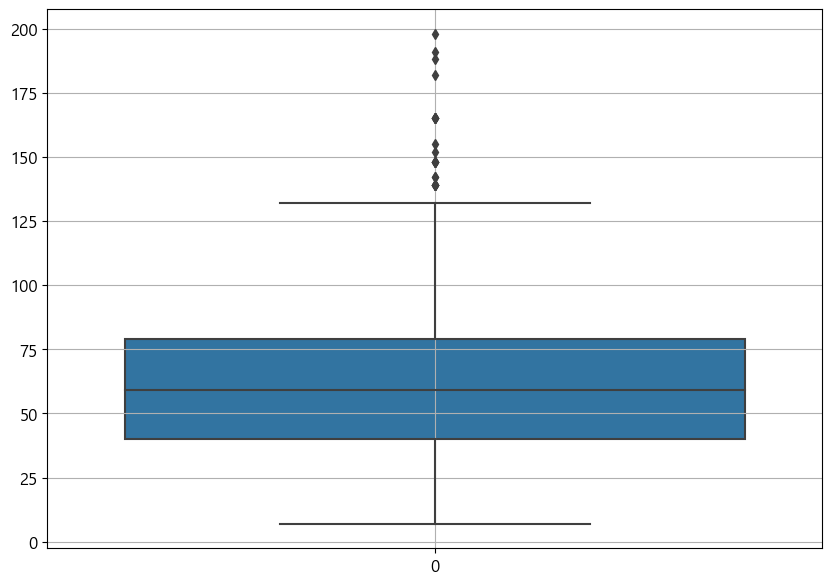

In [149]:
# 주거면적 상자그림
sb.boxplot(data=df2['주거면적'])
plt.grid()
plt.show()
plt.close()

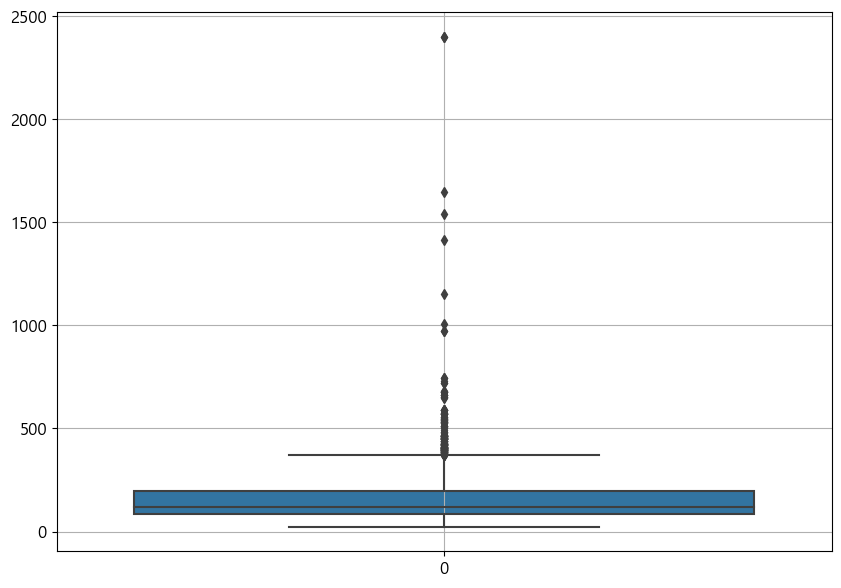

In [150]:
# 총생활비 상자그림
sb.boxplot(data=df2['총생활비'])
plt.grid()
plt.show()
plt.close()

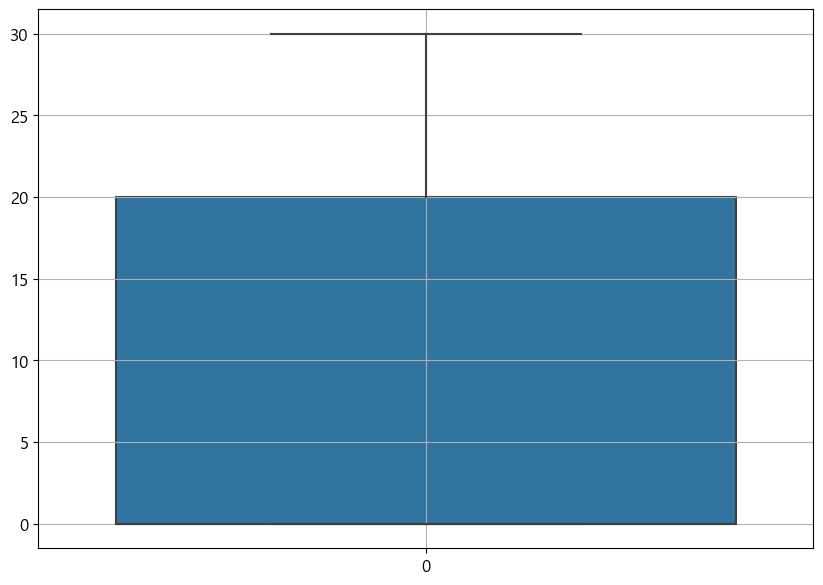

In [151]:
# 근로일수(일) 상자그림
sb.boxplot(data=df2['근로일수(일)'])
plt.grid()
plt.show()
plt.close()

In [152]:
# 산점도행렬 확인 (요인간 자기상관관계 확인)
cnames = df2.columns
연속형 = list(cnames)
연속형

['주거면적', '총생활비', '근로일수(일)']

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x2000 with 0 Axes>

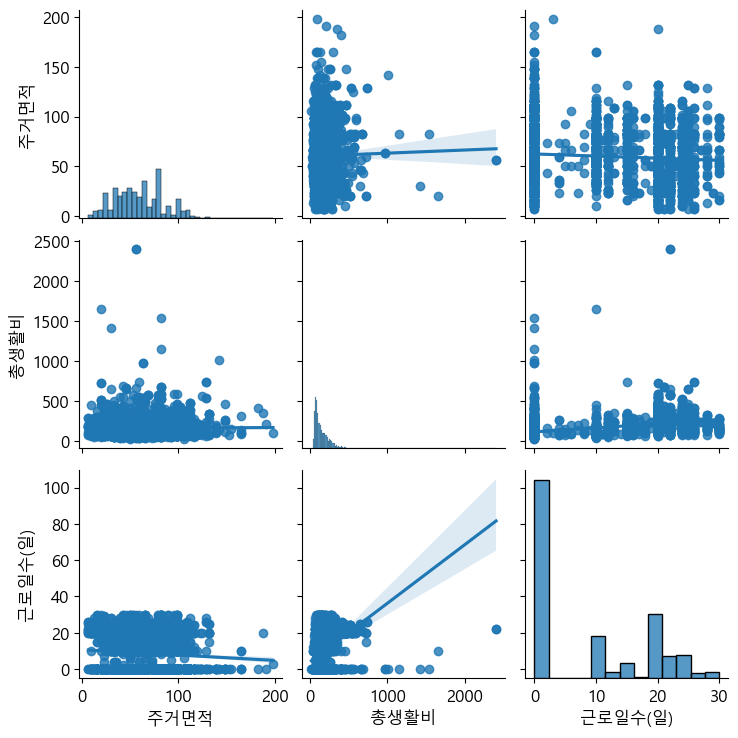

In [153]:
plt.figure(figsize=(30,20))
sb.pairplot(data=df2, vars=연속형, kind='reg')
plt.show()
plt.close()

> 근로일수(일) 과 총생활비 간 상관관계가 있다.

******************

## #3. 조건만족여부 검사

#### 시각화

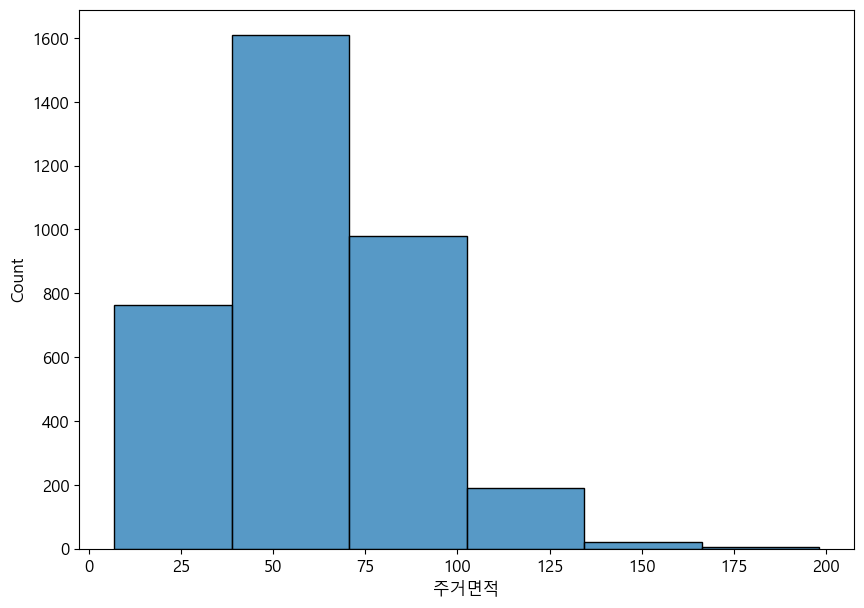

In [154]:
plt.figure()
sb.histplot(data=df2['주거면적'],bins=6)
plt.show()
plt.close()

In [155]:
df2['주거면적'].describe()

count    3566.000000
mean       60.447280
std        26.580791
min         7.000000
25%        40.000000
50%        59.000000
75%        79.000000
max       198.000000
Name: 주거면적, dtype: float64

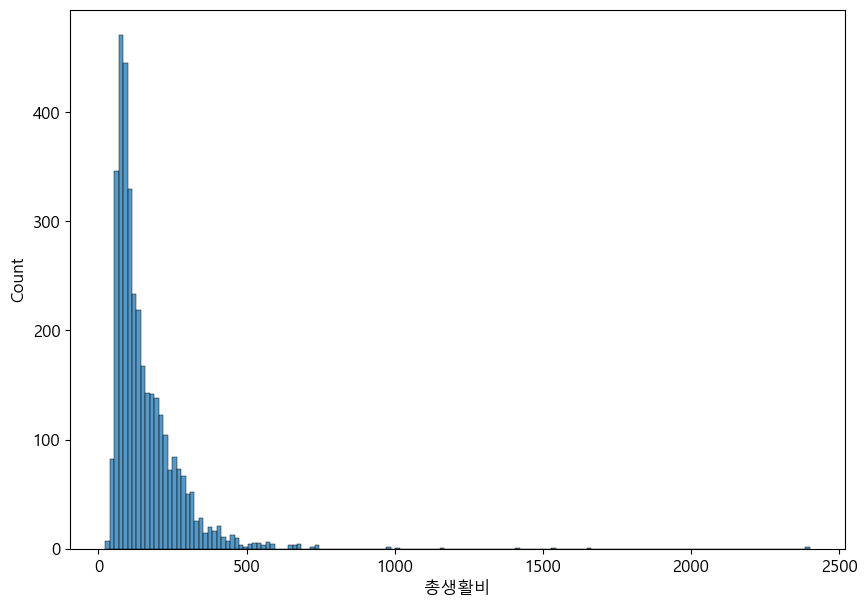

In [156]:
plt.figure()
sb.histplot(data=df2['총생활비'])
plt.show()
plt.close()

In [157]:
df2['총생활비'].describe()

count    3566.000000
mean      156.751262
std       123.304977
min        23.000000
25%        83.000000
50%       119.000000
75%       198.000000
max      2401.000000
Name: 총생활비, dtype: float64

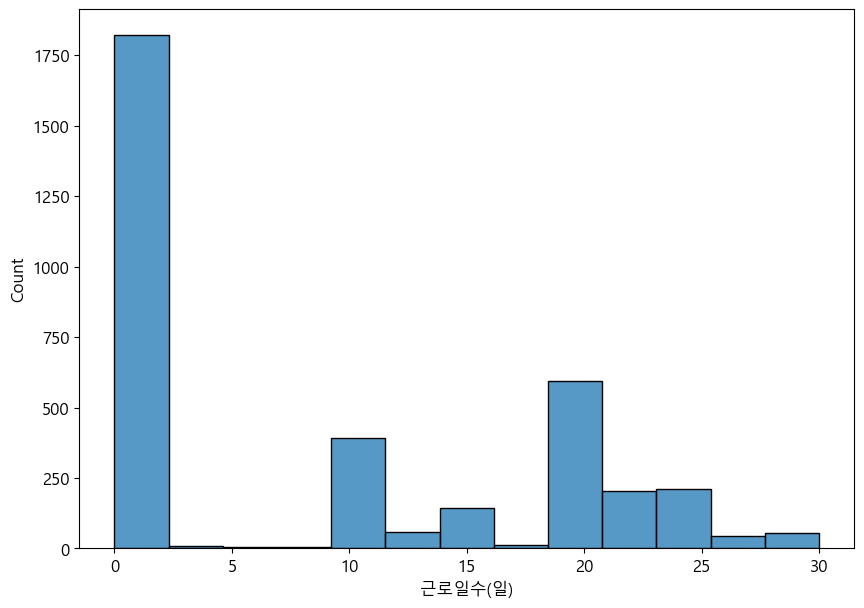

In [158]:
plt.figure()
sb.histplot(data=df2['근로일수(일)'])
plt.show()
plt.close()

### 정규성 (normaltest)

> 일단 normaltest로 정규성 확인해보기

In [159]:
normaltest(df2['주거면적'])

NormaltestResult(statistic=155.8706009367102, pvalue=1.4227515293736378e-34)

In [160]:
normaltest(df2['총생활비'])

NormaltestResult(statistic=4209.401904288761, pvalue=0.0)

In [161]:
normaltest(df2['근로일수(일)'])

NormaltestResult(statistic=27869.67663044616, pvalue=0.0)

> 이상치가 존재하므로 Robust 정규화 진행

### 정규성 (Robust) - 이상치 존재 할 경우

In [162]:
scaler = RobustScaler()
scaler.fit(df2[['주거면적']])
df2['주거면적(Robust)'] = scaler.transform(df2[['주거면적']])
df2

,주거면적,총생활비,근로일수(일),주거면적(Robust)
0,92,275,0,0.846154
1,33,239,15,-0.666667
2,73,156,4,0.358974
3,46,85,10,-0.333333
4,20,54,0,-1.000000
...,...,...,...,...
3561,59,164,10,0.000000
3562,59,99,10,0.000000
3563,59,72,10,0.000000
3564,59,77,10,0.000000


In [163]:
scaler = RobustScaler()
scaler.fit(df2[['총생활비']])
df2['총생활비(Robust)'] = scaler.transform(df2[['총생활비']])
df2

,주거면적,총생활비,근로일수(일),주거면적(Robust),총생활비(Robust)
0,92,275,0,0.846154,1.356522
1,33,239,15,-0.666667,1.043478
2,73,156,4,0.358974,0.321739
3,46,85,10,-0.333333,-0.295652
4,20,54,0,-1.000000,-0.565217
...,...,...,...,...,...
3561,59,164,10,0.000000,0.391304
3562,59,99,10,0.000000,-0.173913
3563,59,72,10,0.000000,-0.408696
3564,59,77,10,0.000000,-0.365217


In [164]:
scaler = RobustScaler()
scaler.fit(df2[['근로일수(일)']])
df2['근로일수(일)(Robust)'] = scaler.transform(df2[['근로일수(일)']])
df2

,주거면적,총생활비,근로일수(일),주거면적(Robust),총생활비(Robust),근로일수(일)(Robust)
0,92,275,0,0.846154,1.356522,0.00
1,33,239,15,-0.666667,1.043478,0.75
2,73,156,4,0.358974,0.321739,0.20
3,46,85,10,-0.333333,-0.295652,0.50
4,20,54,0,-1.000000,-0.565217,0.00
...,...,...,...,...,...,...
3561,59,164,10,0.000000,0.391304,0.50
3562,59,99,10,0.000000,-0.173913,0.50
3563,59,72,10,0.000000,-0.408696,0.50
3564,59,77,10,0.000000,-0.365217,0.50


### 정규성(MinMax scaler)

In [165]:
scaler = MinMaxScaler()
scaler.fit(df2[['주거면적']])
df2['주거면적(MinMax)'] = scaler.transform(df2[['주거면적']])


In [166]:
scaler = MinMaxScaler()
scaler.fit(df2[['총생활비']])
df2['총생활비(MinMax)'] = scaler.transform(df2[['총생활비']])

In [167]:
scaler = MinMaxScaler()
scaler.fit(df2[['근로일수(일)']])
df2['근로일수(일)(MinMax)'] = scaler.transform(df2[['근로일수(일)']])

In [168]:
df2

,주거면적,총생활비,근로일수(일),주거면적(Robust),총생활비(Robust),근로일수(일)(Robust),주거면적(MinMax),총생활비(MinMax),근로일수(일)(MinMax)
0,92,275,0,0.846154,1.356522,0.00,0.445026,0.105971,0.000000
1,33,239,15,-0.666667,1.043478,0.75,0.136126,0.090833,0.500000
2,73,156,4,0.358974,0.321739,0.20,0.345550,0.055929,0.133333
3,46,85,10,-0.333333,-0.295652,0.50,0.204188,0.026072,0.333333
4,20,54,0,-1.000000,-0.565217,0.00,0.068063,0.013036,0.000000
...,...,...,...,...,...,...,...,...,...
3561,59,164,10,0.000000,0.391304,0.50,0.272251,0.059294,0.333333
3562,59,99,10,0.000000,-0.173913,0.50,0.272251,0.031960,0.333333
3563,59,72,10,0.000000,-0.408696,0.50,0.272251,0.020606,0.333333
3564,59,77,10,0.000000,-0.365217,0.50,0.272251,0.022708,0.333333


### 정규성(standard scaler)

In [169]:
scaler = StandardScaler()
df2['주거면적(Standard)'] = scaler.fit_transform(df2[['주거면적']])

In [170]:
scaler = StandardScaler()
df2['총생활비(Standard)'] = scaler.fit_transform(df2[['총생활비']])

In [171]:
scaler = StandardScaler()
df2['근로일수(일)(Standard)'] = scaler.fit_transform(df2[['근로일수(일)']])


In [172]:
df2

,주거면적,총생활비,근로일수(일),주거면적(Robust),총생활비(Robust),근로일수(일)(Robust),주거면적(MinMax),총생활비(MinMax),근로일수(일)(MinMax),주거면적(Standard),총생활비(Standard),근로일수(일)(Standard)
0,92,275,0,0.846154,1.356522,0.00,0.445026,0.105971,0.000000,1.187216,0.959129,-0.896518
1,33,239,15,-0.666667,1.043478,0.75,0.136126,0.090833,0.500000,-1.032743,0.667129,0.621902
2,73,156,4,0.358974,0.321739,0.20,0.345550,0.055929,0.133333,0.472314,-0.006094,-0.491606
3,46,85,10,-0.333333,-0.295652,0.50,0.204188,0.026072,0.333333,-0.543600,-0.581982,0.115762
4,20,54,0,-1.000000,-0.565217,0.00,0.068063,0.013036,0.000000,-1.521887,-0.833427,-0.896518
...,...,...,...,...,...,...,...,...,...,...,...,...
3561,59,164,10,0.000000,0.391304,0.50,0.272251,0.059294,0.333333,-0.054456,0.058795,0.115762
3562,59,99,10,0.000000,-0.173913,0.50,0.272251,0.031960,0.333333,-0.054456,-0.468427,0.115762
3563,59,72,10,0.000000,-0.408696,0.50,0.272251,0.020606,0.333333,-0.054456,-0.687427,0.115762
3564,59,77,10,0.000000,-0.365217,0.50,0.272251,0.022708,0.333333,-0.054456,-0.646871,0.115762


In [173]:
normaltest(df2['주거면적(Robust)'])

NormaltestResult(statistic=155.8706009367102, pvalue=1.4227515293736378e-34)

In [174]:
normaltest(df2['총생활비(Robust)'])

NormaltestResult(statistic=4209.401904288762, pvalue=0.0)

In [175]:
normaltest(df2['주거면적(MinMax)'])

NormaltestResult(statistic=155.87060093671002, pvalue=1.4227515293737607e-34)

In [176]:
normaltest(df2['총생활비(MinMax)'])

NormaltestResult(statistic=4209.401904288762, pvalue=0.0)

In [177]:
normaltest(df2['근로일수(일)(MinMax)'])

NormaltestResult(statistic=27869.67663044616, pvalue=0.0)

In [178]:
normaltest(df2['총생활비(Standard)'])

NormaltestResult(statistic=4209.401904288761, pvalue=0.0)

In [179]:
normaltest(df2['근로일수(일)(MinMax)'])

NormaltestResult(statistic=27869.67663044616, pvalue=0.0)

In [180]:
normaltest(df2['근로일수(일)(Standard)'])

NormaltestResult(statistic=27869.67663044616, pvalue=0.0)

> scaler 후, p-value가 0.05보다 크지 않기 때문에 정규성 검정 결과 정규성 만족 X

In [181]:
ks_2samp(df2['주거면적'], df2['총생활비'])

KstestResult(statistic=0.5931015143017386, pvalue=0.0, statistic_location=82, statistic_sign=1)

In [182]:
ks_2samp(df2['주거면적'], df2['근로일수(일)'])

KstestResult(statistic=0.8993269770050477, pvalue=0.0, statistic_location=25, statistic_sign=-1)

In [183]:
ks_2samp(df2['총생활비'], df2['근로일수(일)'])

KstestResult(statistic=0.9994391475042064, pvalue=0.0, statistic_location=30, statistic_sign=-1)

In [184]:
ks_2samp(df2['주거면적(Robust)'], df2['총생활비(Robust)'])

KstestResult(statistic=0.1982613572630398, pvalue=1.0693611588456816e-61, statistic_location=-0.48717948717948717, statistic_sign=1)

In [185]:
ks_2samp(df2['주거면적(Robust)'], df2['근로일수(일)(Robust)'])

KstestResult(statistic=0.48653954010095346, pvalue=0.0, statistic_location=-0.07692307692307693, statistic_sign=1)

In [186]:
ks_2samp(df2['총생활비(Robust)'], df2['근로일수(일)(Robust)'])

KstestResult(statistic=0.49607403252944476, pvalue=0.0, statistic_location=-0.008695652173913044, statistic_sign=1)

In [187]:
ks_2samp(df2['주거면적(Standard)'], df2['총생활비(Standard)'])

KstestResult(statistic=0.20807627593942793, pvalue=5.83935791517655e-68, statistic_location=-0.919863835108517, statistic_sign=1)

In [188]:
ks_2samp(df2['주거면적(Standard)'], df2['근로일수(일)(Standard)'])

KstestResult(statistic=0.29584969153112733, pvalue=5.226614896412942e-138, statistic_location=-0.8965180407276441, statistic_sign=-1)

In [189]:
ks_2samp(df2['총생활비(Standard)'], df2['근로일수(일)(Standard)'])

KstestResult(statistic=0.5016825574873808, pvalue=0.0, statistic_location=-0.8965180407276441, statistic_sign=-1)

> ks_2samp 결과, 정규성 만족 X

****************

## #4. 피어슨 상관분석

In [190]:
# 원본데이터 + scaler한 데이터로 피어슨 상관관계 분석
df2

,주거면적,총생활비,근로일수(일),주거면적(Robust),총생활비(Robust),근로일수(일)(Robust),주거면적(MinMax),총생활비(MinMax),근로일수(일)(MinMax),주거면적(Standard),총생활비(Standard),근로일수(일)(Standard)
0,92,275,0,0.846154,1.356522,0.00,0.445026,0.105971,0.000000,1.187216,0.959129,-0.896518
1,33,239,15,-0.666667,1.043478,0.75,0.136126,0.090833,0.500000,-1.032743,0.667129,0.621902
2,73,156,4,0.358974,0.321739,0.20,0.345550,0.055929,0.133333,0.472314,-0.006094,-0.491606
3,46,85,10,-0.333333,-0.295652,0.50,0.204188,0.026072,0.333333,-0.543600,-0.581982,0.115762
4,20,54,0,-1.000000,-0.565217,0.00,0.068063,0.013036,0.000000,-1.521887,-0.833427,-0.896518
...,...,...,...,...,...,...,...,...,...,...,...,...
3561,59,164,10,0.000000,0.391304,0.50,0.272251,0.059294,0.333333,-0.054456,0.058795,0.115762
3562,59,99,10,0.000000,-0.173913,0.50,0.272251,0.031960,0.333333,-0.054456,-0.468427,0.115762
3563,59,72,10,0.000000,-0.408696,0.50,0.272251,0.020606,0.333333,-0.054456,-0.687427,0.115762
3564,59,77,10,0.000000,-0.365217,0.50,0.272251,0.022708,0.333333,-0.054456,-0.646871,0.115762


In [191]:
corr = df2.corr(method='pearson')
corr

,주거면적,총생활비,근로일수(일),주거면적(Robust),총생활비(Robust),근로일수(일)(Robust),주거면적(MinMax),총생활비(MinMax),근로일수(일)(MinMax),주거면적(Standard),총생활비(Standard),근로일수(일)(Standard)
주거면적,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516
총생활비,0.014688,1.000000,0.404508,0.014688,1.000000,0.404508,0.014688,1.000000,0.404508,0.014688,1.000000,0.404508
근로일수(일),-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000
주거면적(Robust),1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516
총생활비(Robust),0.014688,1.000000,0.404508,0.014688,1.000000,0.404508,0.014688,1.000000,0.404508,0.014688,1.000000,0.404508
근로일수(일)(Robust),-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000
주거면적(MinMax),1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516
총생활비(MinMax),0.014688,1.000000,0.404508,0.014688,1.000000,0.404508,0.014688,1.000000,0.404508,0.014688,1.000000,0.404508
근로일수(일)(MinMax),-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000,-0.079516,0.404508,1.000000
주거면적(Standard),1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516,1.000000,0.014688,-0.079516


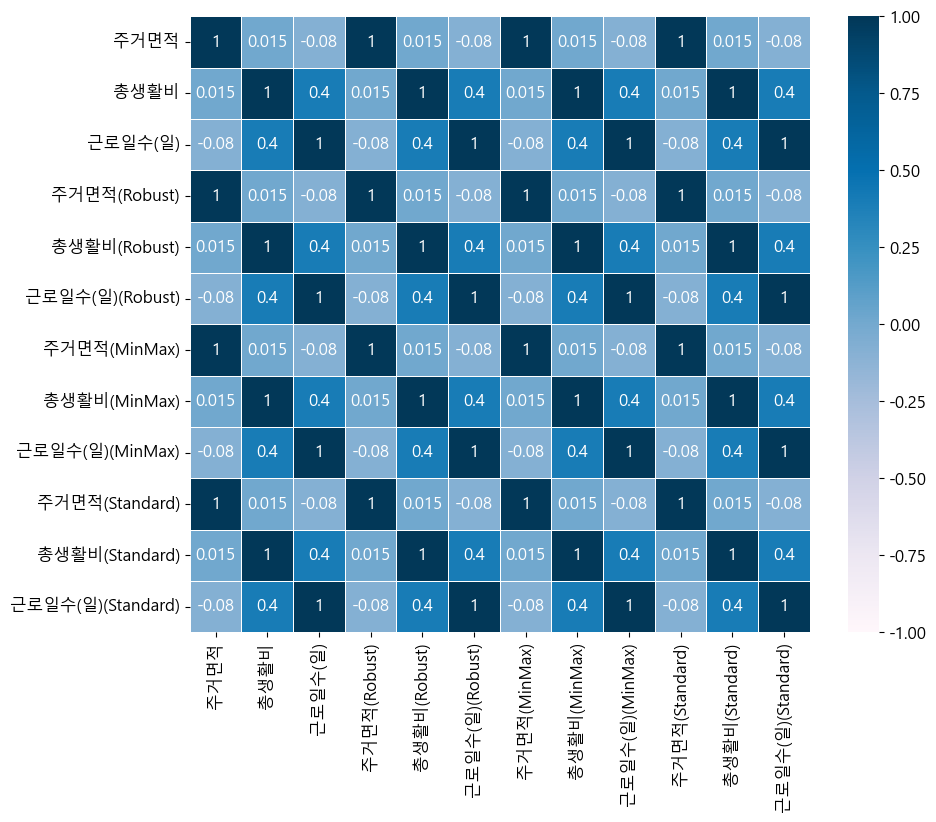

In [192]:
plt.rcParams['figure.figsize'] = (10,8)

sb.heatmap(corr,
           annot=True, 
           cmap='PuBu', 
           vmin=-1, vmax=1, 
           linewidths=.5) 

plt.show()
plt.close()

> 총생활비와 근로일수는 상관이 있다.

************

## #5. 연속형변수를 범주화 시키자! (왜냐면 정규성 만족시키지X)

In [193]:
data = df.filter(['주거면적','총생활비','근로일수(일)'])
data

,주거면적,총생활비,근로일수(일)
0,92,275,0
1,33,239,15
2,73,156,4
3,46,85,10
4,20,54,0
...,...,...,...
3561,59,164,10
3562,59,99,10
3563,59,72,10
3564,59,77,10


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   주거면적     3566 non-null   int64
 1   총생활비     3566 non-null   int64
 2   근로일수(일)  3566 non-null   int64
dtypes: int64(3)
memory usage: 83.7 KB


### 범주화 시키기(라벨링)

In [195]:
def trans(j):
    if j<25:
        return 1
    elif 25<=j<50:
        return 2
    elif 50<=j<75:
        return 3
    elif 75<=j<100:
        return 4
    else:
        return 5

In [196]:
data['주거면적(label)']=data["주거면적"].apply(trans)

In [197]:
data

,주거면적,총생활비,근로일수(일),주거면적(label)
0,92,275,0,4
1,33,239,15,2
2,73,156,4,3
3,46,85,10,2
4,20,54,0,1
...,...,...,...,...
3561,59,164,10,3
3562,59,99,10,3
3563,59,72,10,3
3564,59,77,10,3


In [198]:
def trans2(x):
    if x<80:
        return 1
    elif 80<=x<120:
        return 2
    elif 120<=x<250:
        return 3
    elif 250<=x<350:
        return 4
    else:
        return 5

In [199]:
data['총생활비(label)'] = data['총생활비'].apply(trans2)
data

,주거면적,총생활비,근로일수(일),주거면적(label),총생활비(label)
0,92,275,0,4,4
1,33,239,15,2,3
2,73,156,4,3,3
3,46,85,10,2,2
4,20,54,0,1,1
...,...,...,...,...,...
3561,59,164,10,3,3
3562,59,99,10,3,2
3563,59,72,10,3,1
3564,59,77,10,3,1


In [200]:
def trans3(x):
    if x<8:
        return 1
    elif 8<=x<20:
        return 2
    else :
        return 3


In [201]:
data['근로일수(일)(label)'] = data['근로일수(일)'].apply(trans3)
data

,주거면적,총생활비,근로일수(일),주거면적(label),총생활비(label),근로일수(일)(label)
0,92,275,0,4,4,1
1,33,239,15,2,3,2
2,73,156,4,3,3,1
3,46,85,10,2,2,2
4,20,54,0,1,1,1
...,...,...,...,...,...,...
3561,59,164,10,3,3,2
3562,59,99,10,3,2,2
3563,59,72,10,3,1,2
3564,59,77,10,3,1,2


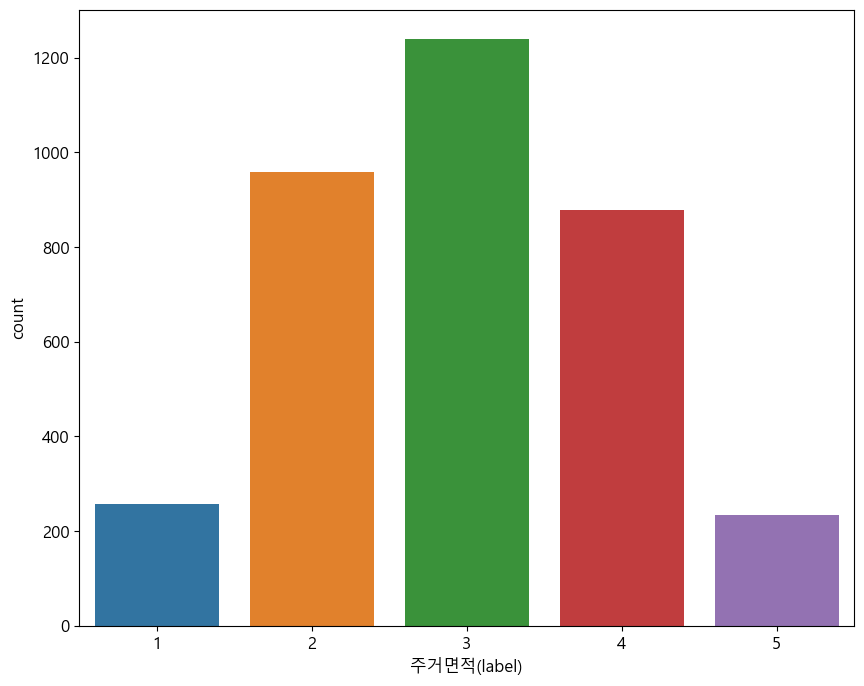

In [202]:
plt.figure()
sb.countplot(data=data, x=data['주거면적(label)'])
plt.show()
plt.close()

> 라벨링 적용 후, 주거면적(label) 정규성 O

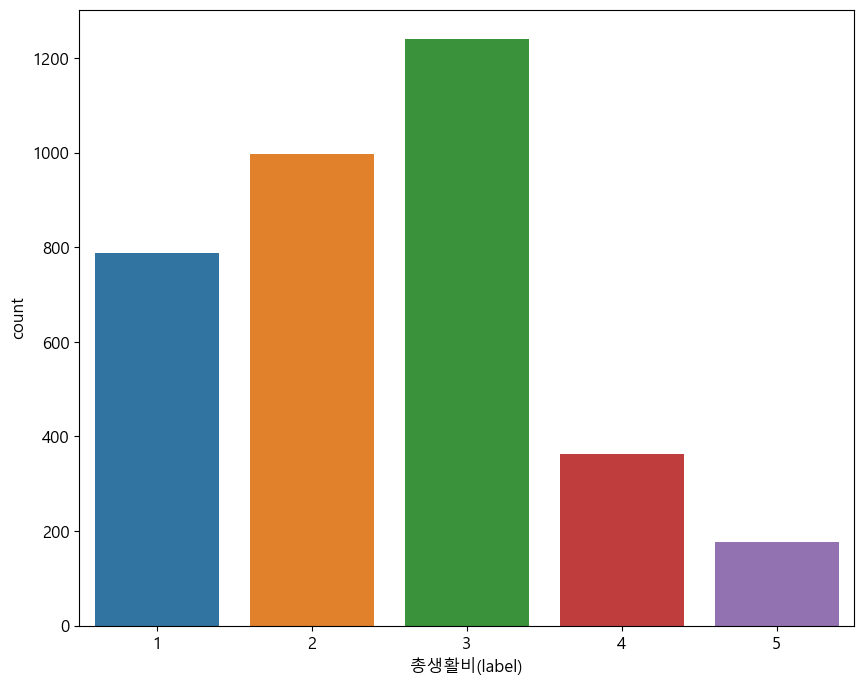

In [203]:
plt.figure()
sb.countplot(data=data, x=data['총생활비(label)'])
plt.show()
plt.close()

> 라벨링 적용 후, 총생활비(label)  정규성 만족하는 걸로...

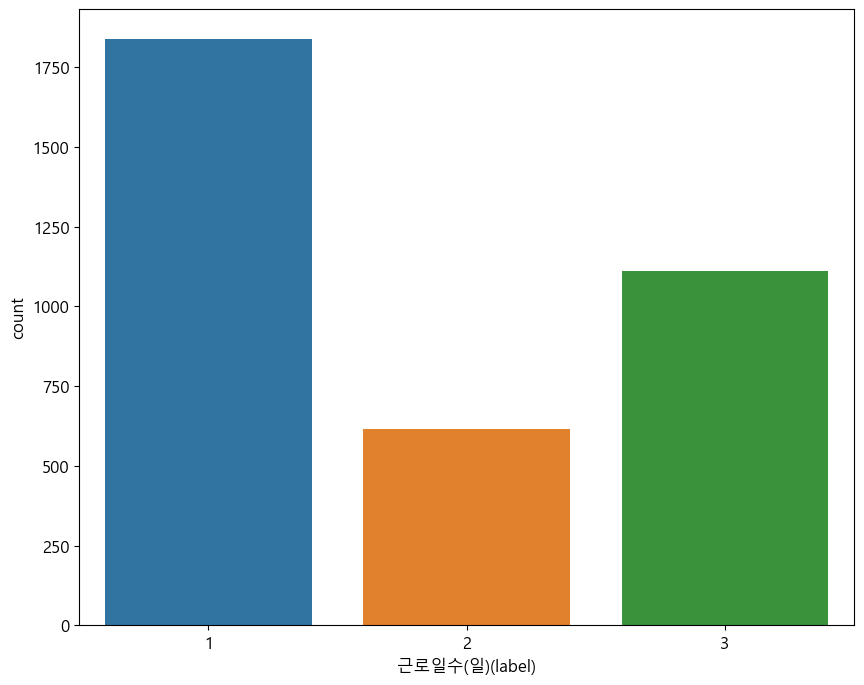

In [204]:
plt.figure()
sb.countplot(data=data, x=data['근로일수(일)(label)'])
plt.show()
plt.close()

> 라벨링 적용 후 , 근로일수(일)(label) 정규성 만족 못하는 걸로... 

********************

> 정규성을 통과하지 못한 근로일수(일)의 경우, 근로유형간 상관관계 분석 후, 만약 상관관계가 있다면, 근로유형이 근로일수(일)을 대신하기로 한다.

## 6. 근로일수(일) 과 근로유형 간 상관관계 분석

### 1) ANOVA for 상관관계

|가설|설명|
|---|---|
|귀무가설|두 변수간 상관관계가 없다.|
|대립가설|두 변수간 상관관계가 있다.|

<br>

|근로유형||
|----|----|
|4. 미취업자(근로능력있음)|4. 미취업자(근로능력있음)|
||5. 미취업자(근로능력없음)|


x=근로유형(범주형), y=근로일수(일)(연속형)

In [205]:
df

,근로유형,삶의 사다리 점수,가족생활에 대한 만족도,주거위치,식료품비-가정식비,식료품비-외식비,주택유형,방수,주거면적,총생활비,...,(바)사회적 친분관계 만족도,(사)여가생활 만족도,집의 (등기상) 점유형태,성별,교육수준,건강상태,만성질환,종교,혼인상태,연령
0,4,6,4,3,50.0,30.0,2,3,92,275,...,3,3,1,2,4,4,3,0,2,78
1,1,5,6,3,40.0,25.0,2,2,33,239,...,4,4,3,1,3,5,3,0,2,75
2,1,4,2,3,40.0,3.0,1,3,73,156,...,4,3,1,1,7,2,3,0,3,81
3,1,4,4,3,30.0,3.0,5,2,46,85,...,2,2,5,2,3,4,3,0,2,83
4,4,4,0,3,35.0,2.0,2,1,20,54,...,3,3,2,1,6,3,0,0,5,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,1,8,6,3,28.0,4.0,5,2,59,164,...,4,4,1,2,3,2,3,0,2,80
3562,1,9,6,3,28.0,5.0,5,2,59,99,...,4,3,2,2,3,2,3,0,2,80
3563,1,5,6,3,24.0,2.0,5,2,59,72,...,3,3,2,2,2,3,3,0,2,87
3564,1,8,6,3,28.0,5.0,5,2,59,77,...,4,4,2,2,3,2,3,0,2,80


In [206]:
# 데이터 가져오기
data2 = df.filter(['근로유형'])
data2

,근로유형
0,4
1,1
2,1
3,1
4,4
...,...
3561,1
3562,1
3563,1
3564,1


In [207]:
data2[data2['근로유형']==5].value_counts()

근로유형
5       12
Name: count, dtype: int64

In [208]:
# 근로유형 4,5 합치기
data2['근로유형'] = data2['근로유형'].map({1:1, 2:2, 3:3 , 4:4, 5:4}) 
data2

,근로유형
0,4
1,1
2,1
3,1
4,4
...,...
3561,1
3562,1
3563,1
3564,1


In [209]:
# 합쳐졌나 확인해보기
data2[data2['근로유형']==5].value_counts()

Series([], Name: count, dtype: int64)

In [210]:
# merge 시키기
data3 = merge(data['근로일수(일)(label)'], data2['근로유형'], left_index=True, right_index=True)
data3

,근로일수(일)(label),근로유형
0,1,4
1,2,1
2,1,1
3,2,1
4,1,4
...,...,...
3561,2,1
3562,2,1
3563,2,1
3564,2,1


In [211]:
data3.rename(columns={'근로유형':'category','근로일수(일)(label)':'day'}, inplace=True)
data3

,day,category
0,1,4
1,2,1
2,1,1
3,2,1
4,1,4
...,...,...
3561,2,1
3562,2,1
3563,2,1
3564,2,1


> 근로일수(일) : day, 근로유형 : category

In [212]:
# 분산분석
model = ols('day ~ C(category)', data=data3).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(category),2.0,2351.727349,1175.863675,9317.448786,0.0
Residual,3563.0,449.651226,0.126200,NaN,NaN


> 근로일수(일) 과 근로유형 간 p값이 0이므로 0.05보다 작아서 대립가설 채택(= 두 변수 간 상관관계가 있다.)

### 2) 로지스틱회귀분석 for 유효성판단

x=근로일수(일)(연속형), y=근로유형(범주형)

In [213]:
# 근로유형 0, 1로 바꿔보기 (근로여부에 따라 1,2->1(유급) / 3,4,5->0(무급 및 미취업자)으로 바꾸기)
data3['category'] = data3['category'].map({1:1,2:1,3:0,4:0,5:0})
data3

,day,category
0,1,0
1,2,1
2,1,1
3,2,1
4,1,0
...,...,...
3561,2,1
3562,2,1
3563,2,1
3564,2,1


In [214]:
model = logit('category ~ day', data=data3)
fit = model.fit()
print(fit.summary())

         Current function value: 0.030935
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               category   No. Observations:                 3566
Model:                          Logit   Df Residuals:                     3564
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Aug 2023   Pseudo R-squ.:                  0.9554
Time:                        13:59:44   Log-Likelihood:                -110.32
converged:                      False   LL-Null:                       -2471.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.7507   2107.805     -0.015      0.988   -4161.973    4100.471
day           26.2404   2107.805      0.012      0.990   -4104.98

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [215]:
# 로지스틱 회귀 설명력 (의사결정계수)
fit.prsquared

0.9553564775561534

> 종속변수(근로유형)의 분산의 약 96% 비율이 독립변수(근무일수(일))에 의해 설명될 수 있다. 

> 근무일수에 따른 근무유형의 예측결과는 설명력 95%를 가진다. (유효성 있다 판단) 

*************

## #8. 근무일수를 0,1로 바꿔보기 (= 카이제곱 검정)

x=근로일수(일)(범주형), y=근로유형(범주형)

|가설|설명|
|---|---|
|귀무가설|근무일수와 근로유형은 연관성이 없다(독립적이다.)|
|대립가설|근무일수와 근로유형은 연관성이 있다(독립적이지 않다.)|

<br>

> 우리는 검정통계량(p-value)가 0.05 이하이어야 근무일수 대신 근로유형 채택가능



카이제곱검정을 위한 조건

1. 자유도가 1인 경우 전체 사례수가 30보다 크면서 각 셀의 빈도가 5 이상일 때 적용가능

2. 사례수가 30보다 크면서 5미만의 기대빈도의 셀이 전체 칸의 20%보다 적고, 모든 셀에 1.0 이상의 기대빈도가 있다면 척도에 상관없이 $X^2$ 검정법을 사용.

3. 각 셀의 기대빈도가 5미만인 경우 변수들의 범주를 묶거나, 묶을 수 없는 경우 이항검정법을 사용.

4. 연령 같은 경우 20대 30대 40대 등등으로 연령을 연령대별로 코딩 변경한 후 분석



In [222]:
data4 = df.filter(['근로유형', '근로일수(일)'])
data4

,근로유형,근로일수(일)
0,4,0
1,1,15
2,1,4
3,1,10
4,4,0
...,...,...
3561,1,10
3562,1,10
3563,1,10
3564,1,10


In [223]:
# 근로유형 4+5 합치기
data4['근로유형'] = data4['근로유형'].map({1:1, 2:2, 3:3, 4:4, 5:4})
data4

,근로유형,근로일수(일)
0,4,0
1,1,15
2,1,4
3,1,10
4,4,0
...,...,...
3561,1,10
3562,1,10
3563,1,10
3564,1,10


In [224]:
# 근로일수(일) => 범주화 (0,1)
data4['근로일수(label)'] = data4['근로일수(일)'].astype('bool')
data4['근로일수'] = data4['근로일수(label)'].astype('int')
data4

,근로유형,근로일수(일),근로일수(label),근로일수
0,4,0,False,0
1,1,15,True,1
2,1,4,True,1
3,1,10,True,1
4,4,0,False,0
...,...,...,...,...
3561,1,10,True,1
3562,1,10,True,1
3563,1,10,True,1
3564,1,10,True,1


In [225]:
data4 = data4.filter(['근로유형','근로일수'])
data4

,근로유형,근로일수
0,4,0
1,1,1
2,1,1
3,1,1
4,4,0
...,...,...
3561,1,1
3562,1,1
3563,1,1
3564,1,1


> x=근로일수(범주형), y=근로유형(범주형)

In [226]:
# crosstab 만들기 (관찰빈도)
observation = crosstab(index=data4['근로일수'], columns=data4['근로유형'], margins=True)
observation

근로유형,1,2,4,All
근로일수,,,,
0,0,0,1819,1819
1,1373,374,0,1747
All,1373,374,1819,3566


> 자유도 : (2-1) * (3-1) = 2

In [227]:
observation2 = crosstab(index=data4['근로일수'], columns=data4['근로유형'])
observation2

근로유형,1,2,4
근로일수,,,
0,0,0,1819
1,1373,374,0


### (1) chi2_contingency 이용

In [228]:
chi2_contingency(observation2, correction=False)

Chi2ContingencyResult(statistic=3566.0000000000005, pvalue=0.0, dof=2, expected_freq=array([[700.36090858, 190.775659  , 927.86343242],
       [672.63909142, 183.224341  , 891.13656758]]))

In [229]:
statistic = chi2_contingency(observation2, correction=False)[0] #검정통계량
pvalue = chi2_contingency(observation2, correction=False)[1] #p-value
dof = chi2_contingency(observation2, correction=False)[2] #자유도
expected_freq = chi2_contingency(observation2, correction=False)[3] #기대도수

print(f"검정통계량 : {statistic} \n", f"pvalue: {pvalue} \n" , f"자유도:{dof} \n", f"기대도수:{expected_freq} \n")

검정통계량 : 3566.0000000000005 
 pvalue: 0.0 
 자유도:2 
 기대도수:[[700.36090858 190.775659   927.86343242]
 [672.63909142 183.224341   891.13656758]] 



> pvalue가 0.05보다 작으므로 귀무가설 기각 대립가설 채택(두 변수간 연관성이 존재한다.(=독립적이지 않다))

### (2) 카이제곱 검정표 이용

In [230]:
# 기대빈도 구하기 1. 퍼센트화
expectancy = crosstab(index=data4['근로일수'], columns=data4['근로유형'], margins=True, normalize=True)
expectancy 

근로유형,1,2,4,All
근로일수,,,,
0,0.000000,0.000000,0.510095,0.510095
1,0.385025,0.104879,0.000000,0.489905
All,0.385025,0.104879,0.510095,1.000000


In [231]:
expectancy.iloc[1,0] = expectancy.iloc[2,0] * expectancy.iloc[1,3]
expectancy.iloc[1,1] = expectancy.iloc[2,1] * expectancy.iloc[1,3]
expectancy.iloc[0,2] = expectancy.iloc[2,2] * expectancy.iloc[0,3]
expectancy * 100

근로유형,1,2,4,All
근로일수,,,,
0,0.000000,0.000000,26.019726,51.009534
1,18.862566,5.138091,0.000000,48.990466
All,38.502524,10.487942,51.009534,100.000000


In [232]:
expectancy.iloc[0,3] = np.nan
expectancy.iloc[1,3] = np.nan
expectancy.iloc[2,3] = np.nan
expectancy.iloc[2,0] = np.nan
expectancy.iloc[2,1] = np.nan
expectancy.iloc[2,2] = np.nan
expectancy * 100

근로유형,1,2,4,All
근로일수,,,,
0,0.000000,0.000000,26.019726,NaN
1,18.862566,5.138091,0.000000,NaN
All,NaN,NaN,NaN,NaN


In [233]:
expectancy.iloc[2,3] = expectancy.iloc[0,2] + expectancy.iloc[1,0] + expectancy.iloc[1,1]
expectancy * 100

근로유형,1,2,4,All
근로일수,,,,
0,0.000000,0.000000,26.019726,NaN
1,18.862566,5.138091,0.000000,NaN
All,NaN,NaN,NaN,50.020383


![probability_level](./chi2.jpeg)

> $x^2(2, 0.05) = 5.991$ (카이제곱검정표 참고) 이므로 $x^2$ = 50.02 > $x^2(2, 0.05) = 5.991$ 이므로 귀무가설을 기각. 즉, 두 변수간 연관성이 존재한다.

### (3) 직접 계산

In [234]:
# (기대빈도) 
expectancy = observation.copy()
expectancy

근로유형,1,2,4,All
근로일수,,,,
0,0,0,1819,1819
1,1373,374,0,1747
All,1373,374,1819,3566


In [235]:
# NAN값으로 채우기
for a in range((len(list(expectancy.index)))-1):
    for b in range((len(list(expectancy.columns)))-1):
        expectancy.iloc[a,b] = np.nan

In [236]:
expectancy

근로유형,1,2,4,All
근로일수,,,,
0,NaN,NaN,NaN,1819
1,NaN,NaN,NaN,1747
All,1373.0,374.0,1819.0,3566


In [237]:
expectancy.iloc[0,3] = expectancy.iloc[0,3] / expectancy.iloc[2,3]
expectancy.iloc[1,3] = expectancy.iloc[1,3] / expectancy.iloc[2,3]
expectancy

근로유형,1,2,4,All
근로일수,,,,
0,NaN,NaN,NaN,0.510095
1,NaN,NaN,NaN,0.489905
All,1373.0,374.0,1819.0,3566.000000


In [238]:
# 기대빈도 
expectancy.iloc[0,0] = expectancy.iloc[2,0]*expectancy.iloc[0,3]
expectancy.iloc[1,0] = expectancy.iloc[2,0]*expectancy.iloc[1,3]
expectancy.iloc[0,1] = expectancy.iloc[2,1]*expectancy.iloc[0,3]
expectancy.iloc[1,1] = expectancy.iloc[2,1]*expectancy.iloc[1,3]
expectancy.iloc[0,2] = expectancy.iloc[2,2]*expectancy.iloc[0,3]
expectancy.iloc[1,2] = expectancy.iloc[2,2]*expectancy.iloc[1,3]
expectancy

근로유형,1,2,4,All
근로일수,,,,
0,700.360909,190.775659,927.863432,0.510095
1,672.639091,183.224341,891.136568,0.489905
All,1373.000000,374.000000,1819.000000,3566.000000


In [239]:
expectancy.iloc[0,3] = np.nan
expectancy.iloc[1,3] = np.nan
expectancy.iloc[2,3] = np.nan
expectancy.iloc[2,0] = np.nan
expectancy.iloc[2,1] = np.nan
expectancy.iloc[2,2] = np.nan
expectancy

근로유형,1,2,4,All
근로일수,,,,
0,700.360909,190.775659,927.863432,NaN
1,672.639091,183.224341,891.136568,NaN
All,NaN,NaN,NaN,NaN


> 사례수가 30보다 크면서 (O)

> 5미만의 기대빈도의 셀이 전체 칸의 20%보다 적고, (O) 

> 모든 셀에 1.0 이상의 기대빈도가 있다 (O)

In [240]:
# (관찰빈도 - 기대빈도)**2 / 기대빈도
(observation - expectancy)**2 / expectancy

근로유형,1,2,4,All
근로일수,,,,
0,700.360909,190.775659,855.863432,NaN
1,729.225239,198.638193,891.136568,NaN
All,NaN,NaN,NaN,NaN


*****************

## #9. 조건을 만족하는 연속형변수 주거면적, 총생활비 순서척도로 변환 후 상관관계 분석

두 변수 X, Y가 연속형 자료이나 정규성을 만족하지 않는 경우, 순서척도인 경우 스피어만 상관계수를 사용

|가설|설명|
|---|--|
|귀무가설|두 변수의 상관계수가 0이다.(=연관성존재)|
|대립가설|두 변수의 상관계수가 0이 아니다.(=연관성존재x)|

In [241]:
data = df.filter(['주거면적', '총생활비'])
data

,주거면적,총생활비
0,92,275
1,33,239
2,73,156
3,46,85
4,20,54
...,...,...
3561,59,164
3562,59,99
3563,59,72
3564,59,77


In [242]:
def trans(x):
    if x<25:
        return 1
    elif 25<=x<50:
        return 2
    elif 50<=x<75:
        return 3
    elif 75<=x<100:
        return 4
    else:
        return 5

In [243]:
data['주거면적(label)']=data["주거면적"].apply(trans)

In [244]:
def trans2(x):
    if x<80:
        return 1
    elif 80<=x<120:
        return 2
    elif 120<=x<250:
        return 3
    elif 250<=x<350:
        return 4
    else:
        return 5

In [245]:
data['총생활비(label)'] = data['총생활비'].apply(trans2)

In [246]:
data2 = data.filter(['주거면적(label)','총생활비(label)'])
data2

,주거면적(label),총생활비(label)
0,4,4
1,2,3
2,3,3
3,2,2
4,1,1
...,...,...
3561,3,3
3562,3,2
3563,3,1
3564,3,1


In [247]:
data2.corr(method='spearman')

,주거면적(label),총생활비(label)
주거면적(label),1.000000,0.020774
총생활비(label),0.020774,1.000000


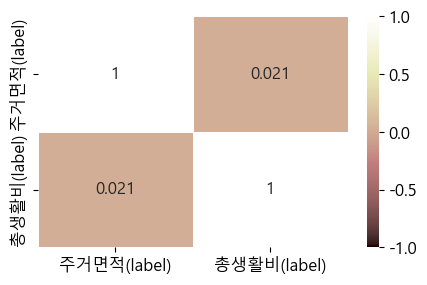

In [248]:
plt.rcParams['figure.figsize'] = (5,3)
sb.heatmap(data2.corr(method='spearman'), annot=True, cmap='pink', vmin=-1, vmax=1, linewidths=.5)
plt.show()
plt.close()

> pvalue가 0.00이므로 0.05보다 작기때문에 대립가설 채택. 즉, 주거면적과 총생활비는 서로 연관성 존재X

******************

# 10. 연속형변수 끼리 anova for 독립성

연령, 방수, 주거면적, 총생활비

In [281]:
df = read_excel(r'C:\Users\hanjieun_2\Documents\카카오톡 받은 파일\데이터전처리2.xlsx')
data5 = df.filter(['연령','방수'])

In [282]:
data2 = data.filter(['주거면적','총생활비'])
data2

,주거면적,총생활비
0,92,275
1,33,239
2,73,156
3,46,85
4,20,54
...,...,...
3561,59,164
3562,59,99
3563,59,72
3564,59,77


In [283]:
df = merge(data5, data2, left_index=True, right_index=True)
df

,연령,방수,주거면적,총생활비
0,78,3,92,275
1,75,2,33,239
2,81,3,73,156
3,83,2,46,85
4,61,1,20,54
...,...,...,...,...
3561,80,2,59,164
3562,80,2,59,99
3563,87,2,59,72
3564,80,2,59,77


In [284]:
vars = list(df.columns)
vars

['연령', '방수', '주거면적', '총생활비']

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

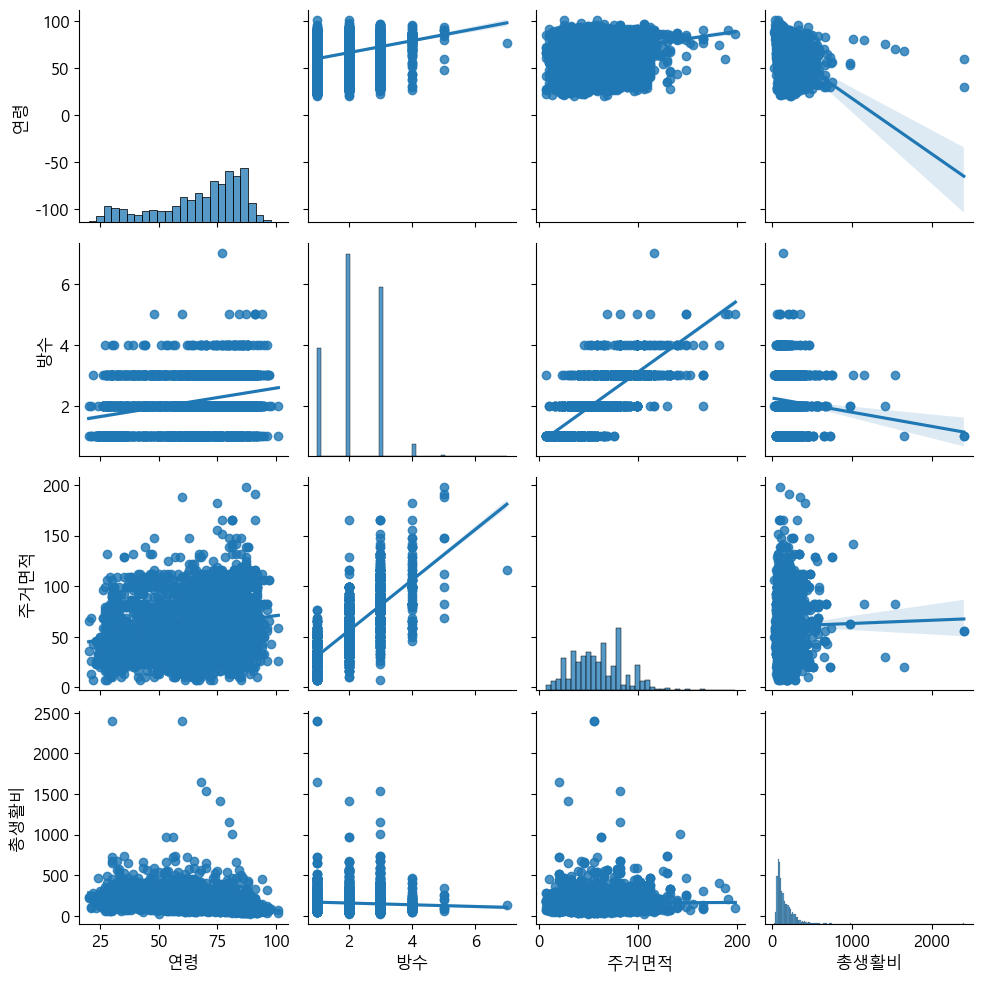

In [285]:
# 시각화
plt.figure(figsize=(10,10))
sb.pairplot(data=df, vars=vars, kind='reg')
plt.show()
plt.close()

> 주거면적과 방수 간의 상관관계가 있을 것 같다.

In [286]:
df

,연령,방수,주거면적,총생활비
0,78,3,92,275
1,75,2,33,239
2,81,3,73,156
3,83,2,46,85
4,61,1,20,54
...,...,...,...,...
3561,80,2,59,164
3562,80,2,59,99
3563,87,2,59,72
3564,80,2,59,77


In [287]:
df.dtypes

연령      int64
방수      int64
주거면적    int64
총생활비    int64
dtype: object

In [267]:
# df['방수'] = df['방수'].astype('category')
# df['주거면적(label)'] = df['방수'].astype('category')
# df['총생활비(label)'] = df['방수'].astype('category')

In [256]:
df.dtypes

방수             category
주거면적(label)    category
총생활비(label)    category
dtype: object

In [288]:
df.rename(columns={'연령':'age','방수':'room','주거면적':'width','총생활비':'livingmoney'}, inplace=True)
df

,age,room,width,livingmoney
0,78,3,92,275
1,75,2,33,239
2,81,3,73,156
3,83,2,46,85
4,61,1,20,54
...,...,...,...,...
3561,80,2,59,164
3562,80,2,59,99
3563,87,2,59,72
3564,80,2,59,77


In [327]:
scaler = MinMaxScaler()
scaler.fit(df)
df= scaler.transform(df)
sdf=DataFrame(df)
sdf

,0,1,2,3
0,0.716049,0.333333,0.445026,0.105971
1,0.679012,0.166667,0.136126,0.090833
2,0.753086,0.333333,0.345550,0.055929
3,0.777778,0.166667,0.204188,0.026072
4,0.506173,0.000000,0.068063,0.013036
...,...,...,...,...
3561,0.740741,0.166667,0.272251,0.059294
3562,0.740741,0.166667,0.272251,0.031960
3563,0.827160,0.166667,0.272251,0.020606
3564,0.740741,0.166667,0.272251,0.022708


In [328]:
sdf.rename(columns={0:'age',1:'room',2:'width',3:'livingmoney'}, inplace=True)
sdf

,age,room,width,livingmoney
0,0.716049,0.333333,0.445026,0.105971
1,0.679012,0.166667,0.136126,0.090833
2,0.753086,0.333333,0.345550,0.055929
3,0.777778,0.166667,0.204188,0.026072
4,0.506173,0.000000,0.068063,0.013036
...,...,...,...,...
3561,0.740741,0.166667,0.272251,0.059294
3562,0.740741,0.166667,0.272251,0.031960
3563,0.827160,0.166667,0.272251,0.020606
3564,0.740741,0.166667,0.272251,0.022708


In [330]:
import itertools
comb=[list(x) for x in itertools.combinations(sdf.columns,r=2)]

In [331]:
result=[]
for col in comb:
    for i in range(2):
        temp={}
        formula=f'{col[i]}~{col[1-i]}'
        model=ols(formula, data=sdf).fit()
        temp['combination'],temp['coef'],temp['pvalue']=[col[i],col[1-i]],model.params[1],model.pvalues[1]
        result.append(temp)

In [332]:
model=ols('room~width', data=sdf).fit()

In [333]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   room   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     5014.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:02:55   Log-Likelihood:                 3637.4
No. Observations:                3566   AIC:                            -7271.
Df Residuals:                    3564   BIC:                            -7258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0112      0.003     -3.403      0.001      -0.018      -0.005
width          0.7438      0.011     70.810      0.000       0.723       0.764
==============================================================================
Omnibus:                      212.173   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.774
Skew:                           0.444   Prob(JB):                     1.70e-84
Kurtosis:                       4.345   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
DataFrame(result)

,combination,coef,pvalue
0,"[age, room]",0.471711,5.438280e-66
1,"[room, age]",0.168106,5.438280e-66
2,"[age, width]",0.363010,2.428591e-41
3,"[width, age]",0.136702,2.428591e-41
4,"[age, livingmoney]",-1.739959,1.522181e-135
5,"[livingmoney, age]",-0.090963,1.522181e-135
6,"[room, width]",0.743750,0.000000e+00
7,"[width, room]",0.785914,0.000000e+00
8,"[room, livingmoney]",-0.183466,2.670380e-05
9,"[livingmoney, room]",-0.026914,2.670380e-05


> 회귀계수가 0에 가깝고, 통계적으로 유의미한 것(차이가 있다 = 독립적이다)

*************

## #11. 결론

1. 연속형 변수 : '연령','방수', '주거면적', '총생활비','근로일수(일)'

2. 정규성 만족 : '주거면적', '총생활비'

3. 정규성 만족 x : '근로일수(일)'

4. 정규성을 만족하지 않은 변수 '근로일수(일)' 에 대해 근로유형간 상관관계 분석
- 일원분산분석 결과(x(범주형)=근로유형, y(연속형)=근로일수(일)) : 두 변수간 상관관계가 없다.
- 로지스틱회귀분석 결과 (x(연속형)=근로일수(일), y(범주형)=근로유형) : 유효하다.
- 카이제곱검정결과 (x(범주형)=근로일수(일), y(범주형)=근로유형) : 서로 연관성이 존재(독립성X)

<!-- 5. 정규성을 만족하는 변수 '주거면적'과 '총생활비'에 대해 스피어만 상관관계 진행 -->
<!-- - 서로 연관성 존재X -->
5. 연령, 방수, 주거면적, 총생활비 간 회귀분석으로 독립성 검정(coef가 0에 가까울 수록 통계적으로 유의미 = 독립적이다.)

6. 최종변수 : 연령, 주거면적, 총생활비 (근로일수는 근로유형으로 대신한다.)